<a href="https://colab.research.google.com/github/shrikrishnachannawar/TCP_IP_Intrusion-system/blob/main/TCP_IP_Intrusion_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TCP_IP_Intrusion_Detection_Model


## 1. Data Preprocessing & EDA

In [ ]:
#import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train=pd.read_csv('/content/Train_data.csv')
test=pd.read_csv('/content/Test_data.csv')
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
#describe the data
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# cheking the dtypes
train.dtypes

,0
duration,int64
protocol_type,object
service,object
flag,object
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train.shape, train.size

((25192, 42), 1058064)

In [ ]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [ ]:
train.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
train.duplicated().sum()

0

In [ ]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [ ]:
print(train['protocol_type'].unique()),
print(train["service"].unique()),
print(train["flag"].unique()),
print(train["class"].unique())

['tcp' 'udp' 'icmp']
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
['normal' 'anomaly']


<Axes: xlabel='class', ylabel='count'>

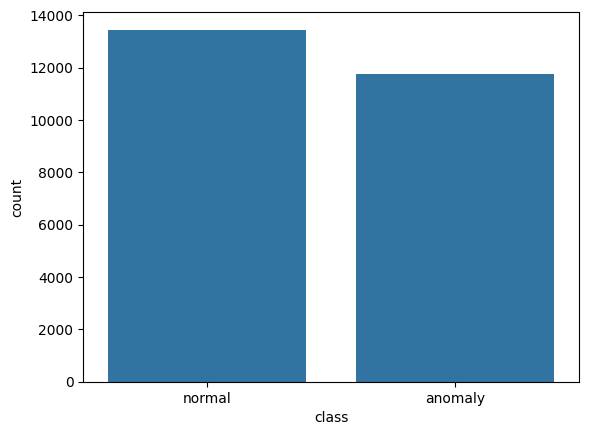

In [ ]:
sns.countplot(x=train['class'])

In [ ]:
train['class']=train['class'].replace({'normal': '0', 'anomaly':'1'})
train['class']

,class
0,0
1,0
2,1
3,0
4,0
...,...
25187,1
25188,1
25189,1
25190,1


In [ ]:
#changing  the cetagorical data into the numarical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#train['class']=LabelEncoder().fit_transform(train['class'])
# using the one hot encoding  for flag and protocal type
train=pd.get_dummies(train, columns=['protocol_type', 'flag'])

# servide columns have so many unique values for that we are going to use the  frequency encoding.(it assigne the freq of each unique value)
service_freq = train['service'].value_counts().to_dict()
train['service'] = train['service'].map(service_freq)


In [ ]:
#scaling the numaric features
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns
train[numeric_columns] = scaler.fit_transform(train[numeric_columns])


<Axes: >

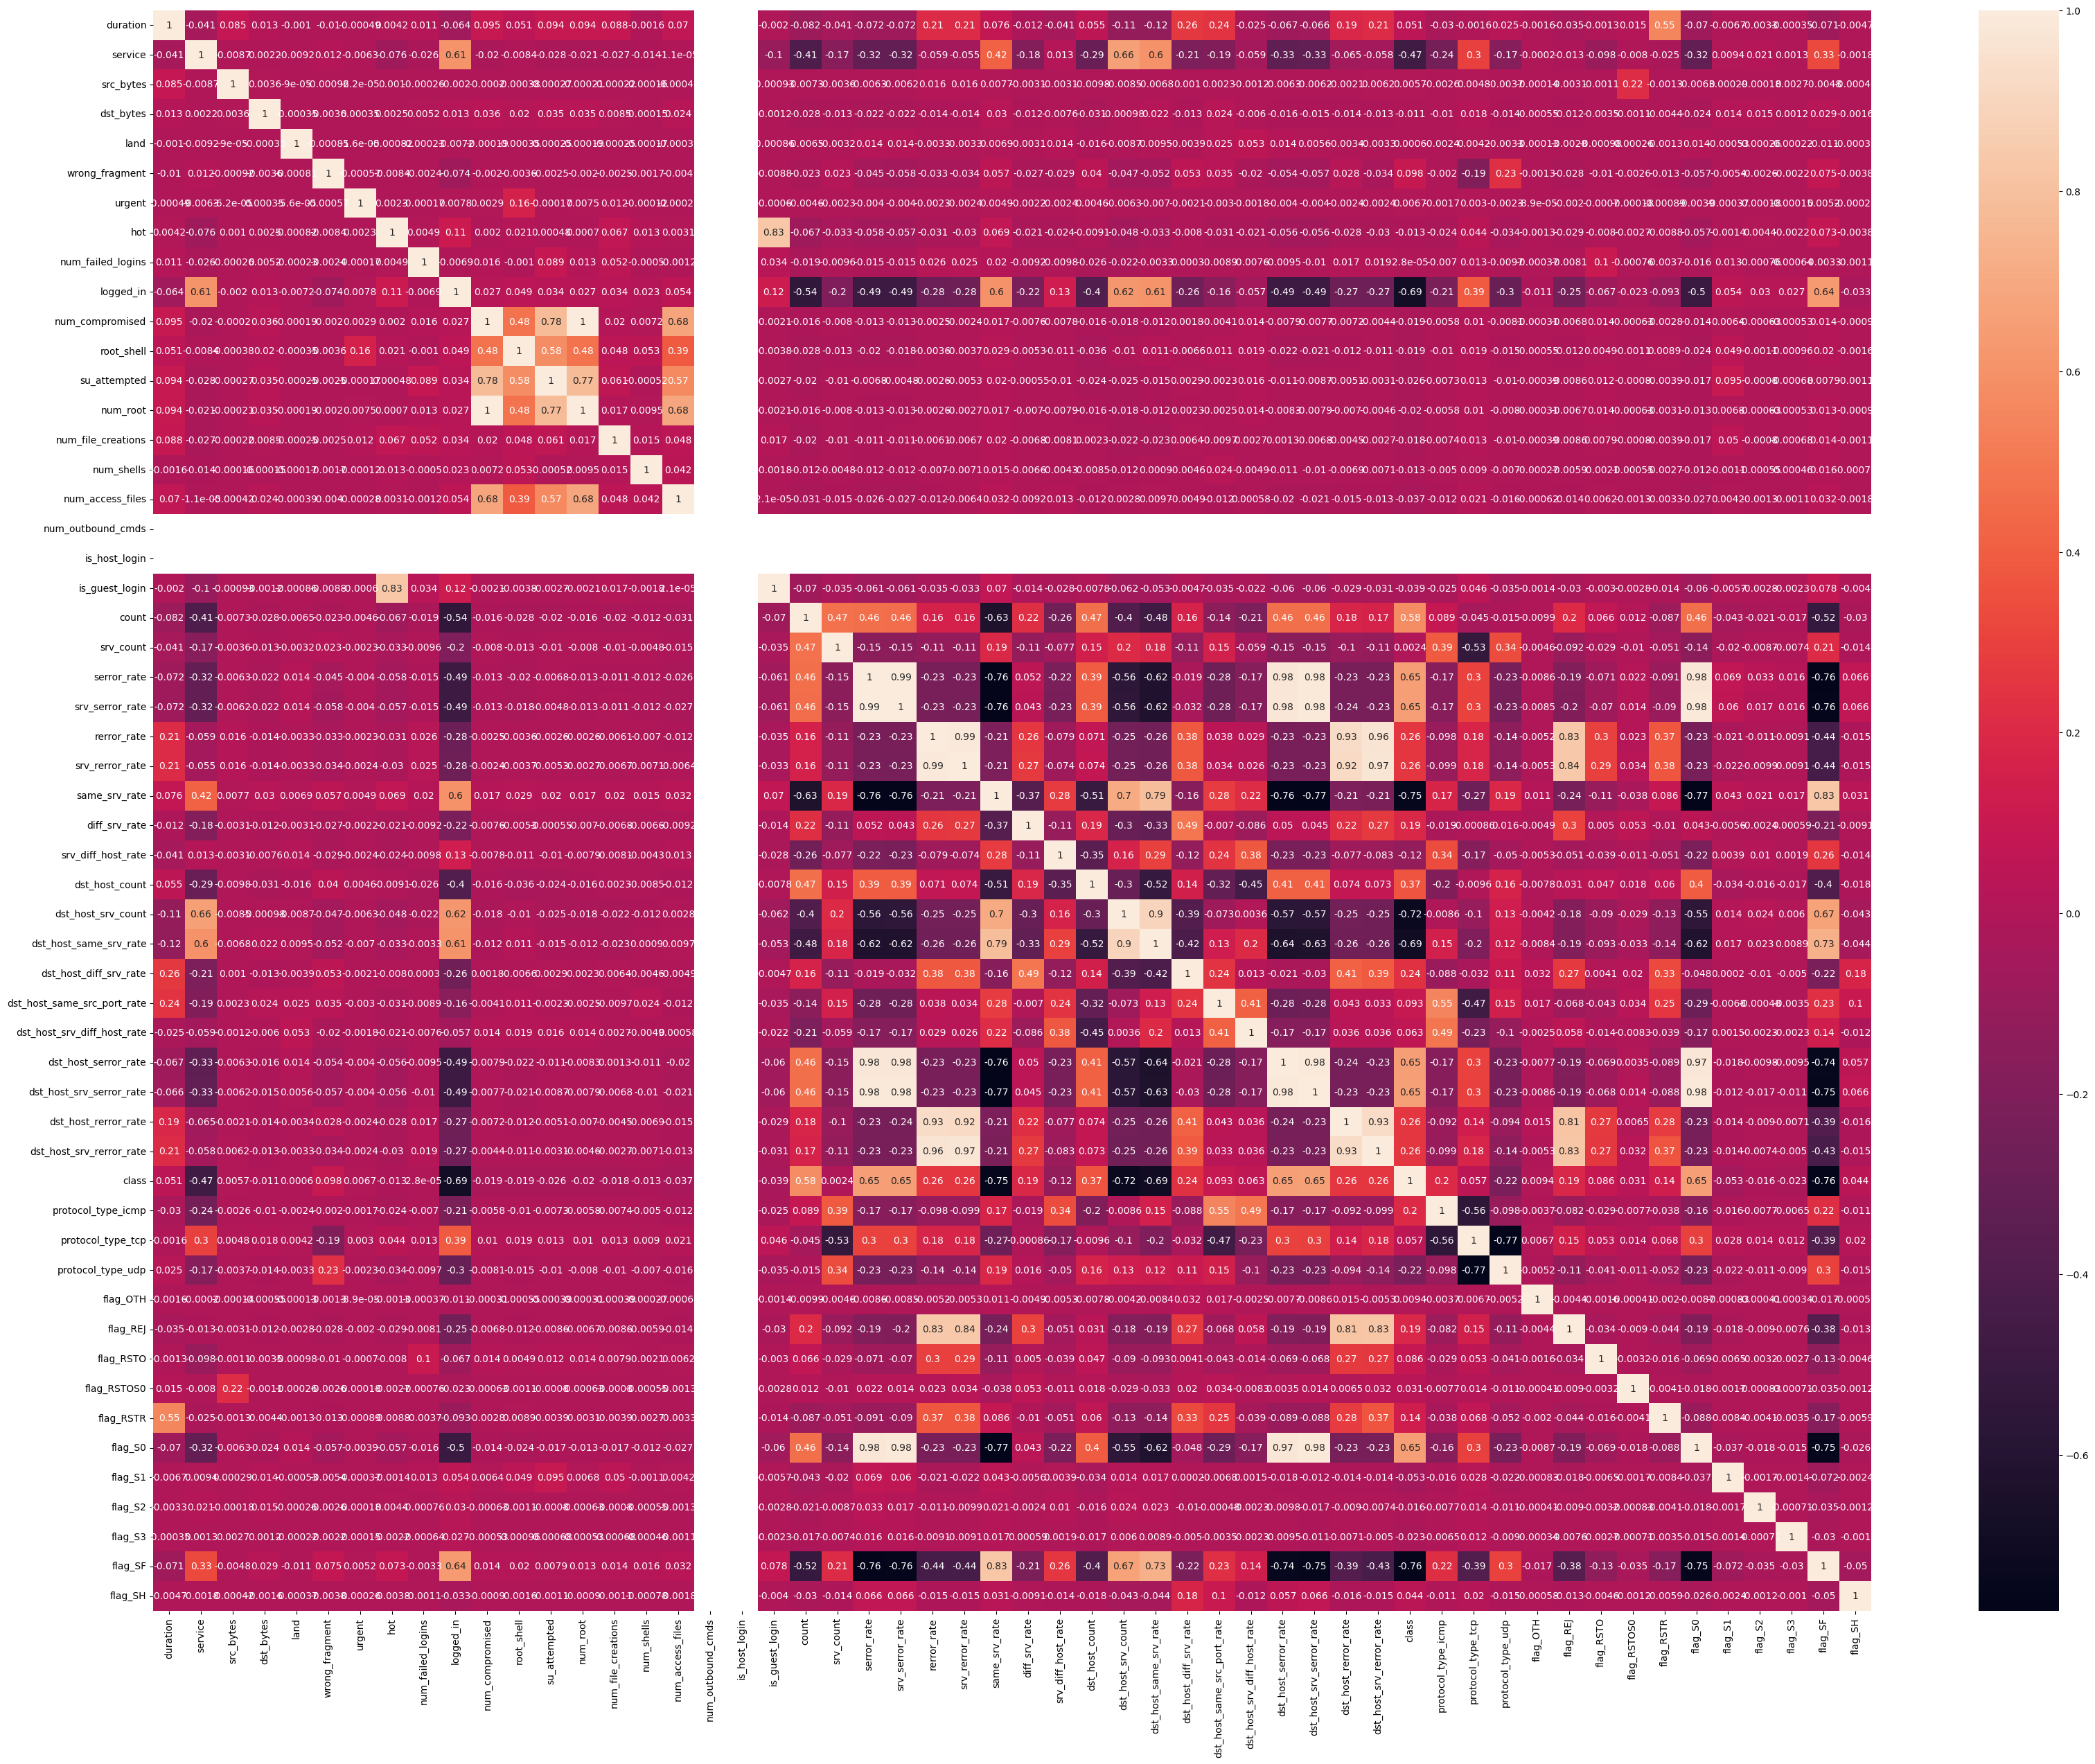

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(train.corr(), annot=True)

## 2.Feature Selection
we are going to use the wrapper  method. These methods evaluate the usefulness of features by training a machine learning model and assessing its performance.
### Recursive Feature Elimination(RFE):
RFE recursively removes the least important features and builds the model until the specified number of features is reached. Its commonly used with models like SVM or linear regression.



In [ ]:
x_train = train.drop(['class'], axis=1)
y_train = train['class']

In [ ]:
# feature selection using the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import itertools
model = LogisticRegression()
selector = RFE(model, n_features_to_select=10)
rfe = selector.fit(x_train, y_train)
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x_train.columns)]
selected_features = [v for i, v in feature_map if i==True]
selected_features

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

['num_compromised',
 'su_attempted',
 'num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'protocol_type_icmp',
 'flag_REJ',
 'flag_S1',
 'flag_S3']

In [ ]:
# Feature selection using the randomForest classifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import itertools
model1 =  RandomForestClassifier()
selector = RFE(estimator=model1, n_features_to_select=10)
rfe = selector.fit(x_train, y_train)
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x_train.columns)]
selected_features2 = [v for i, v in feature_map if i==True]
selected_features2

['service',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'flag_SF']

In [ ]:
x_train1= x_train[selected_features2]

In [ ]:
x_train

,duration,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.113551,-0.713652,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,...,False,False,False,False,False,False,False,False,True,False
1,-0.113551,-0.880092,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,...,False,False,False,False,False,False,False,False,True,False
2,-0.113551,0.200530,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,...,False,False,False,False,True,False,False,False,False,False
3,-0.113551,1.330342,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,...,False,False,False,False,False,False,False,False,True,False
4,-0.113551,1.330342,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,-1.117378,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,...,False,True,False,False,False,False,False,False,False,False
25188,-0.113551,-0.713652,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,...,False,False,False,False,False,False,False,False,True,False
25189,-0.113551,0.200530,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,...,True,False,False,False,False,False,False,False,False,False
25190,-0.113551,-1.107478,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
y_train

,class
0,0
1,0
2,1
3,0
4,0
...,...
25187,1
25188,1
25189,1
25190,1


In [ ]:
x_train=x_train[selected_features]

In [ ]:
x_train.shape

(25192, 10)

In [ ]:
y_train=y_train.astype('int64')
y_train.dtypes

dtype('int64')

In [ ]:
from sklearn.model_selection import train_test_split
#split for the feature of selection form the logistic regressiom
X_train,X_test, Y_train, Y_test=train_test_split(x_train, y_train, train_size=0.8, random_state=2)
#split for the feature selected by the random forest classifier
X_train1,X_test1, Y_train1, Y_test1=train_test_split(x_train1, y_train, train_size=0.8, random_state=2)


## Making  The Deep Learning model

In [ ]:
#usig the featurre selected form the random fores classifire
import tensorflow as tf

#setting the random seed
tf.random.set_seed(42)

#Creating the layer
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compiling the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy']  )

#fit the data into the model
model.fit(X_train1, Y_train, epochs=100)

Epoch 1/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9401 - loss: 0.1567
Epoch 2/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9619 - loss: 0.1050
Epoch 3/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9694 - loss: 0.0899
Epoch 4/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0796
Epoch 5/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0721
Epoch 6/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0702
Epoch 7/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9765 - loss: 0.0688
Epoch 8/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9771 - loss: 0.0645
Epoch 9/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9777 - loss: 0.0600
Epoch 10/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9783 - loss: 0.0593
Epoch 11/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9784 - loss: 0.0591
Epoch 12/100
630/630 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# using  features feature from the logistic regression
import tensorflow as tf

#setting the random seed
tf.random.set_seed(42)

#Creating the layer
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compiling the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy']  )

#fit the data into the model
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9342 - loss: 0.1806
Epoch 2/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9497 - loss: 0.1403
Epoch 3/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9521 - loss: 0.1367
Epoch 4/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9519 - loss: 0.1346
Epoch 5/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9525 - loss: 0.1321
Epoch 6/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9526 - loss: 0.1313
Epoch 7/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9530 - loss: 0.1299
Epoch 8/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9535 - loss: 0.1295
Epoch 9/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9525 - loss: 0.1320
Epoch 10/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9530 - loss: 0.1289
Epoch 11/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9534 - loss: 0.1282
Epoch 12/100
630/630 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
y_preds=model.predict(X_test)
mae = tf.metrics.mae(y_true=Y_test,
                    y_pred=y_preds)
mae



158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<tf.Tensor: shape=(5039,), dtype=float32, numpy=
array([6.1273575e-05, 8.6585671e-01, 8.0757797e-02, ..., 2.5390512e-01,
       2.5390512e-01, 5.1140785e-05], dtype=float32)>

In [ ]:
Y_train.dtypes

dtype('int64')

In [ ]:
loss, accuracy=model.evaluate(X_train, Y_train)
print(f"Loss:{loss}")
print(f"Accurscy:{accuracy}")

630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9563 - loss: 0.1220
Loss:0.12413102388381958
Accurscy:0.9546469449996948


In [ ]:
X_train.dtypes

,0
num_compromised,float64
su_attempted,float64
num_root,float64
srv_serror_rate,float64
srv_rerror_rate,float64
dst_host_srv_count,float64
protocol_type_icmp,bool
flag_REJ,bool
flag_S1,bool
flag_S3,bool


In [ ]:
Y_train.dtypes

dtype('int64')

## 3. Saving the model

In [ ]:
'''
import pickle

# Save the model
filename = 'tcp_intrusion_model.sav'
pickle.dump(model, open(filename, 'wb'))
'''

In [ ]:
'''
from google.colab import files
files.download('tcp_intrusion_model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>